<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-02 16:11:15.332365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [3]:
epsilon = 0.95

constants_dict = {
    "GRIDSTEP": 0.005,
    "K": 5
}

target_data_dict = {
    "data_name": "Mushroom",
    "classes": [0, 1],
    "dims": "all",
    "dim_reduction": "UMAP",
    "other": ""
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [5]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples={0: 1400}, calib_size=0.5)
setup_dict.keys()

Data loaded: ./../pickles/Mushroom-2labels-alldims-UMAP.pickle
sample dims: (5443, 2) | (2681, 2)
label dims: (5443,) | (2681,)
train labels: [0 1]
test labels: [0 1]
Start preparing grid: (5443, 2)
8400
1
Done preparing grid: (67200000, 2)

Train samples: (4219, 2)
{0: 0.33, 1: 0.67}
Test samples: (2681, 2)
{1: 0.52, 0: 0.48}
Prop: (2109, 2) (2109,) 
Calib: (2110, 2) (2110,)
X_prop: (2109, 2)
{0: 0.33, 1: 0.67}
X_calib: (2110, 2)
{1: 0.67, 0: 0.33}
[0, 1]


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(2110,)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(67200000,)


p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(67200000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

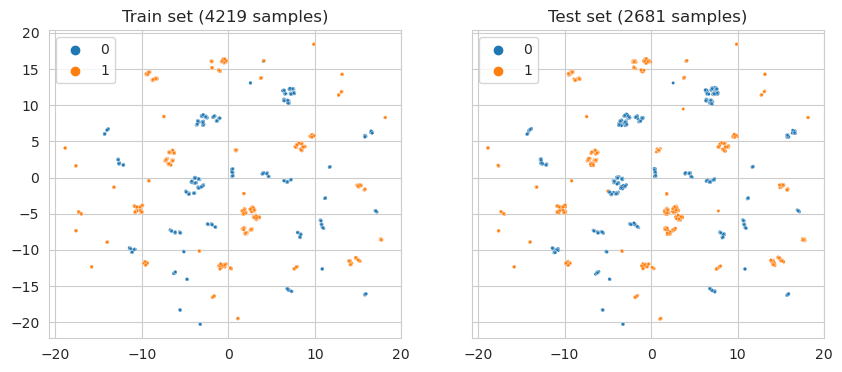

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

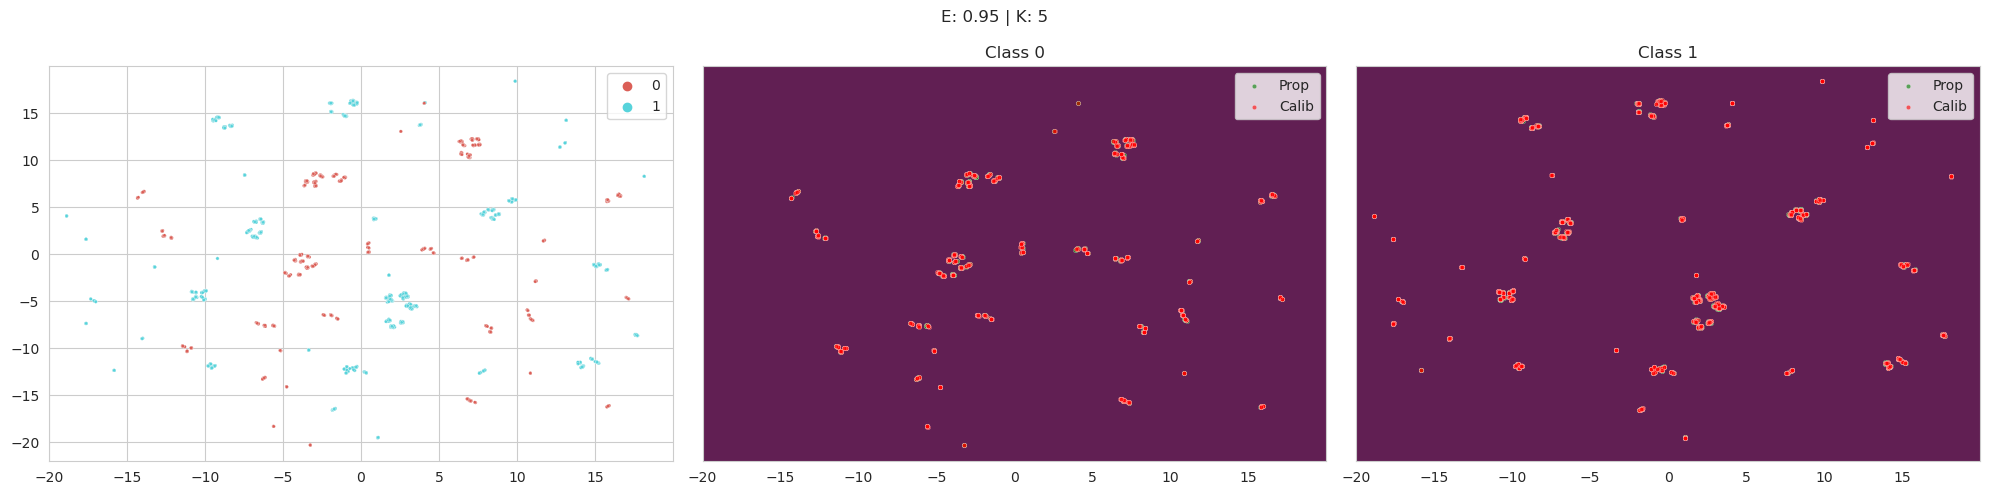

Synthetic samples per class
Label 0: (1939, 2)
Label 1: (665, 2)
(1939,)
(2604,)


2023-11-02 16:12:59.735244: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.




Baseline results: ORIGINAL
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.29      0.44      1292
           1       0.60      0.97      0.74      1389

    accuracy                           0.64      2681
   macro avg       0.75      0.63      0.59      2681
weighted avg       0.75      0.64      0.60      2681



Total synthetic samples: (2604, 2)
Total O+S samples: (6823, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1292
           1       0.93      0.74      0.82      1389

    accuracy                           0.83      2681
   macro avg       0.85      0.84      0.83      2681
weighted avg       0.85      0.83      0.83      2681



CLASS 0 | Total: (6158, 2) (synthetic (1939, 2) )
ORIGINAL+SYNTHETIC (CLASS 0)
84/84 [==============================] - 0

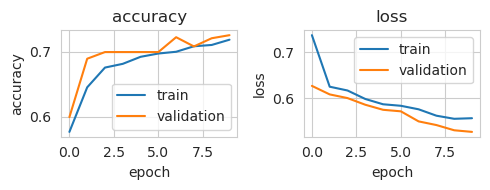

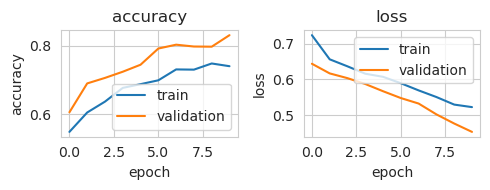

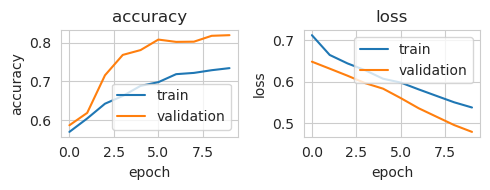

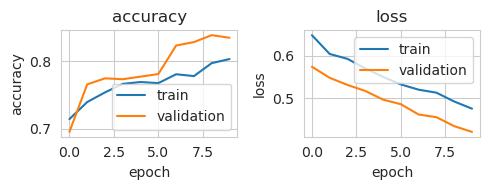

In [7]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=1)

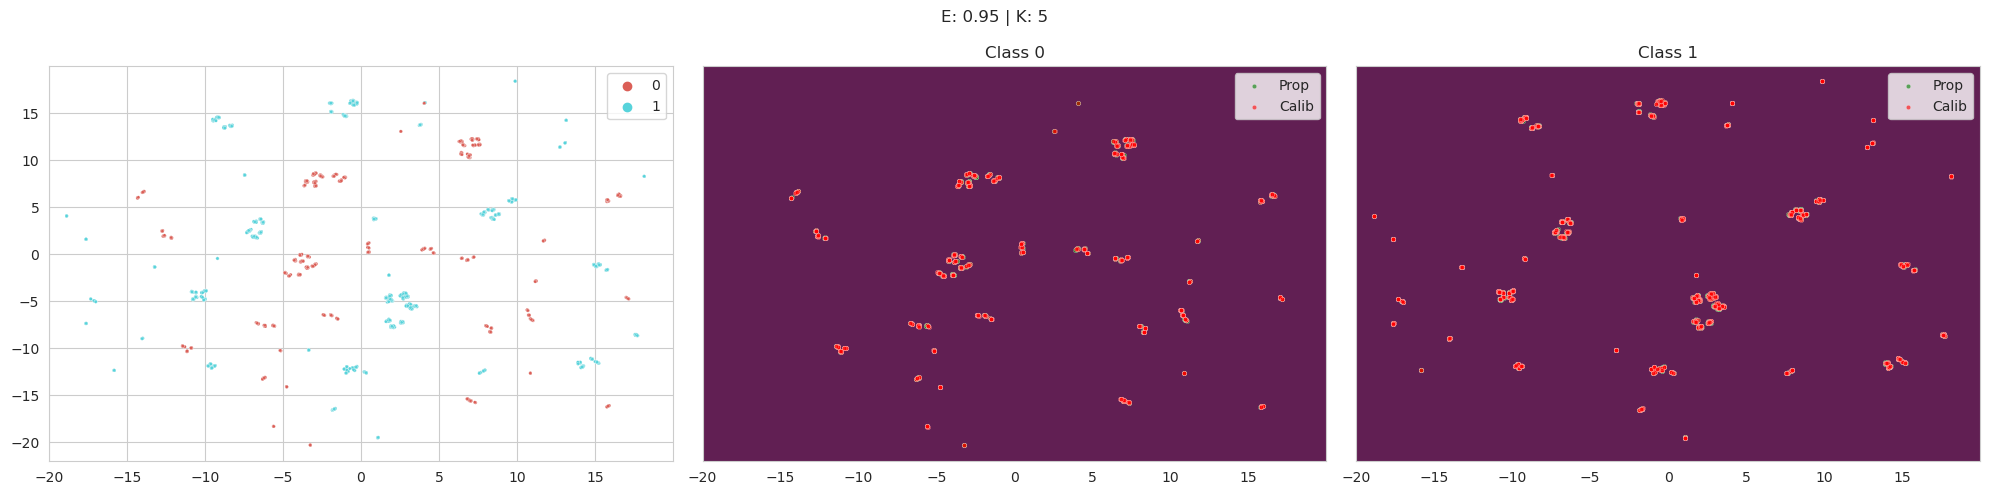

Synthetic samples per class
Label 0: (1939, 2)
Label 1: (665, 2)
(1939,)
(2604,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.25      0.40      1292
           1       0.59      1.00      0.74      1389

    accuracy                           0.64      2681
   macro avg       0.79      0.63      0.57      2681
weighted avg       0.78      0.64      0.58      2681



Total synthetic samples: (2604, 2)
Total O+S samples: (6823, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1292
           1       0.86      0.73      0.79      1389

    accuracy                           0.80      2681
   macro avg       0.80      0.80      0.80      2681
weighted avg       0.80      0.80      0.80      2681



CLASS 0 | Total: (6158, 2) (synthetic (19

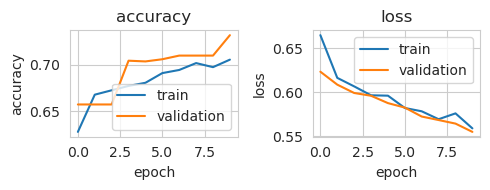

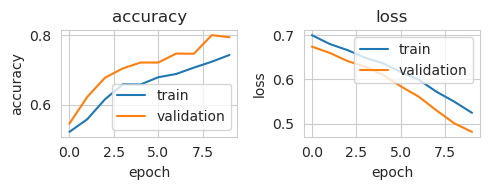

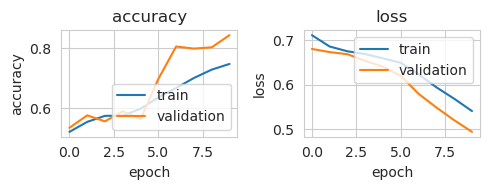

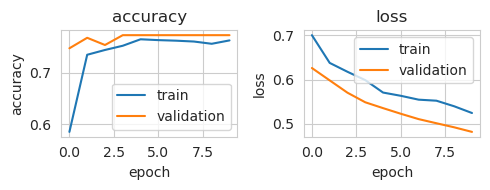

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=12)

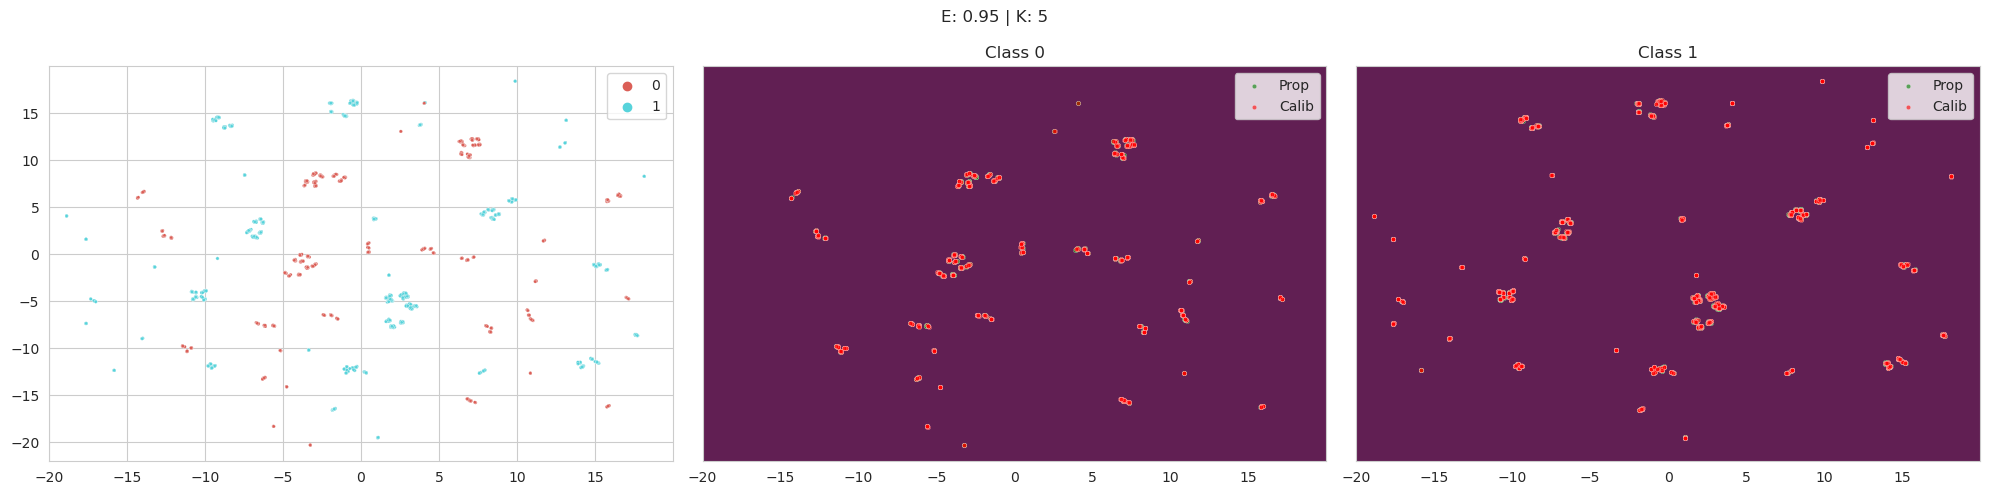

Synthetic samples per class
Label 0: (1939, 2)
Label 1: (665, 2)
(1939,)
(2604,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 882us/step
              precision    recall  f1-score   support

           0       0.87      0.36      0.51      1292
           1       0.61      0.95      0.75      1389

    accuracy                           0.66      2681
   macro avg       0.74      0.65      0.63      2681
weighted avg       0.74      0.66      0.63      2681



Total synthetic samples: (2604, 2)
Total O+S samples: (6823, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1292
           1       0.91      0.81      0.86      1389

    accuracy                           0.86      2681
   macro avg       0.86      0.86      0.86      2681
weighted avg       0.87      0.86      0.86      2681



CLASS 0 | Total: (6158, 2) (synthetic (

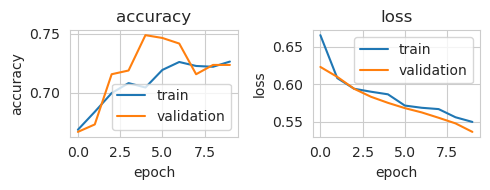

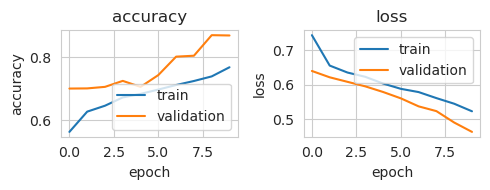

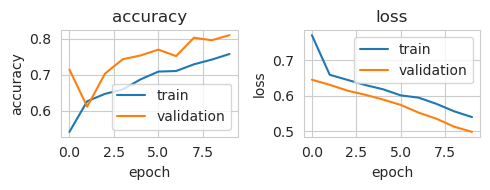

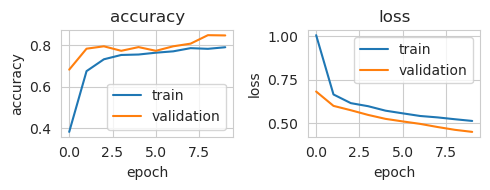

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=42)

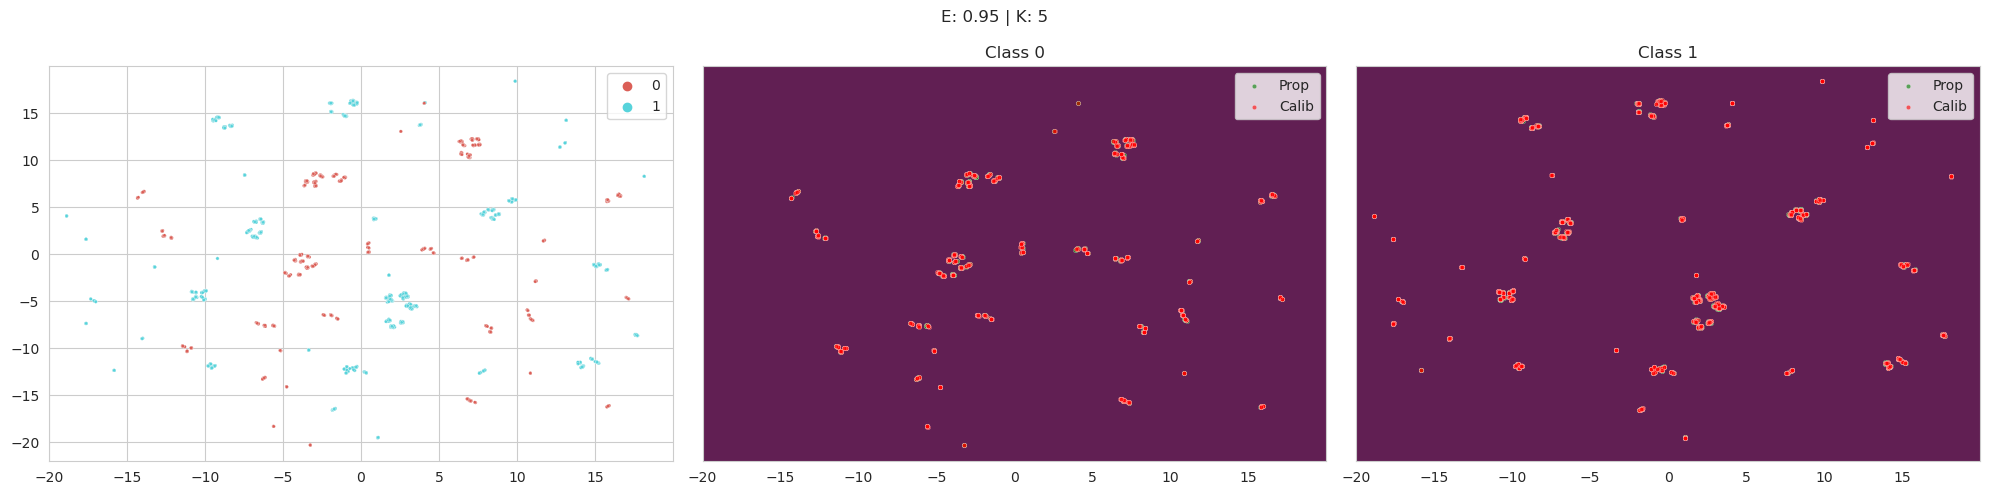

Synthetic samples per class
Label 0: (1939, 2)
Label 1: (665, 2)
(1939,)
(2604,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.27      0.42      1292
           1       0.59      1.00      0.74      1389

    accuracy                           0.64      2681
   macro avg       0.79      0.63      0.58      2681
weighted avg       0.78      0.64      0.59      2681



Total synthetic samples: (2604, 2)
Total O+S samples: (6823, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1292
           1       0.76      0.73      0.74      1389

    accuracy                           0.74      2681
   macro avg       0.74      0.74      0.74      2681
weighted avg       0.74      0.74      0.74      2681



CLASS 0 | Total: (6158, 2) (synthetic (19

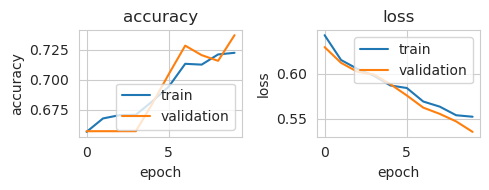

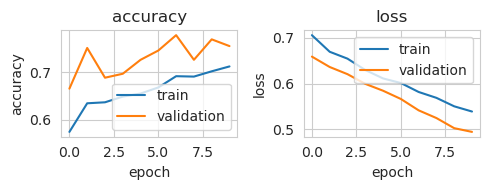

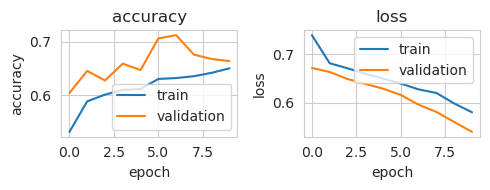

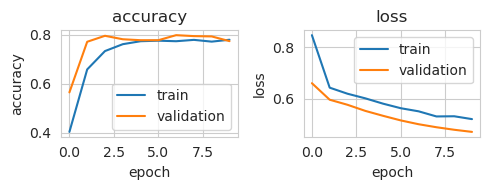

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=50)

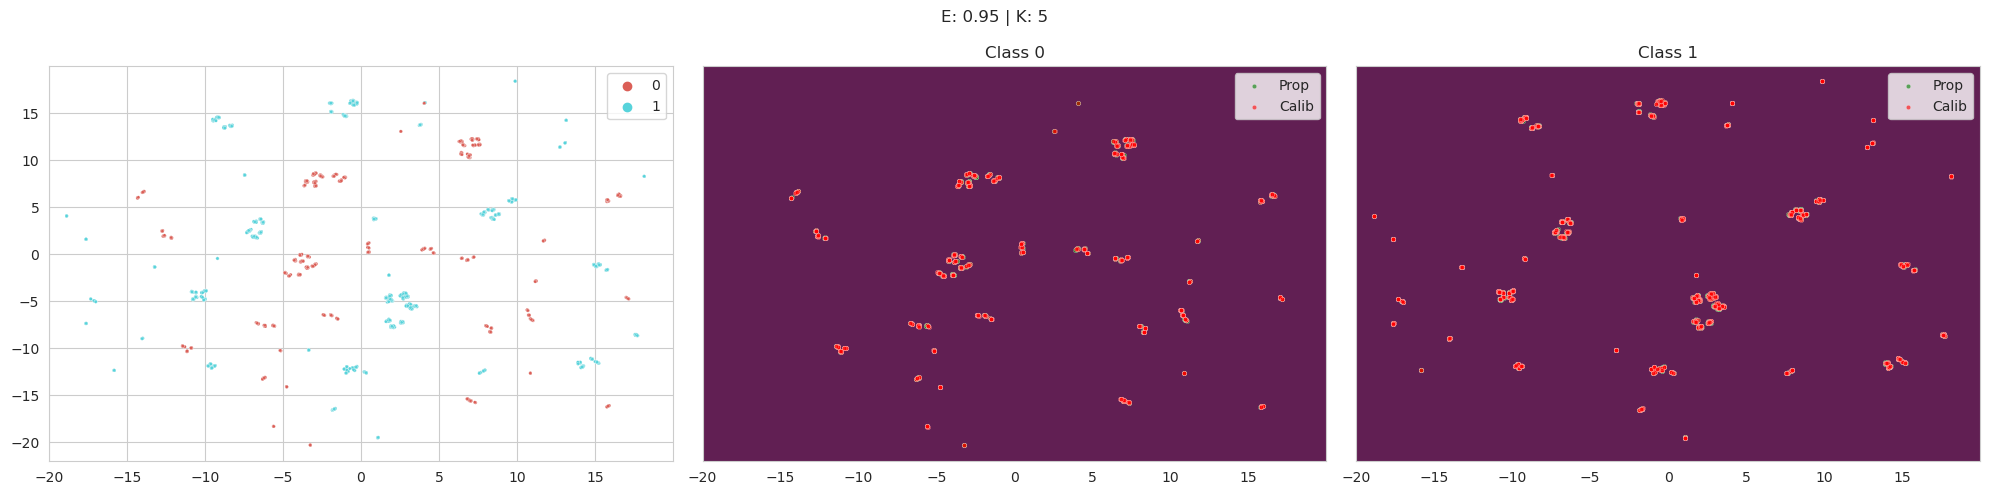

Synthetic samples per class
Label 0: (1939, 2)
Label 1: (665, 2)
(1939,)
(2604,)


Baseline results: ORIGINAL
84/84 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.24      0.38      1292
           1       0.58      0.98      0.73      1389

    accuracy                           0.62      2681
   macro avg       0.74      0.61      0.55      2681
weighted avg       0.74      0.62      0.56      2681



Total synthetic samples: (2604, 2)
Total O+S samples: (6823, 2)
ORIGINAL + SYNTHETIC
84/84 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1292
           1       0.75      0.81      0.78      1389

    accuracy                           0.76      2681
   macro avg       0.76      0.76      0.76      2681
weighted avg       0.76      0.76      0.76      2681



CLASS 0 | Total: (6158, 2) (synthetic (19

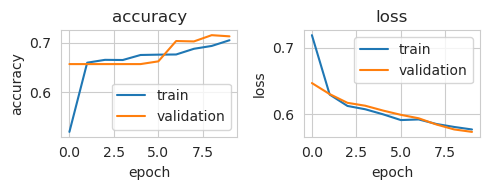

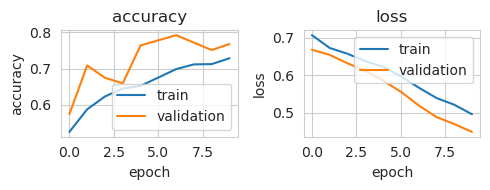

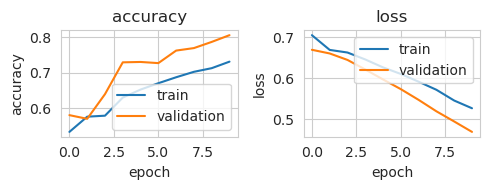

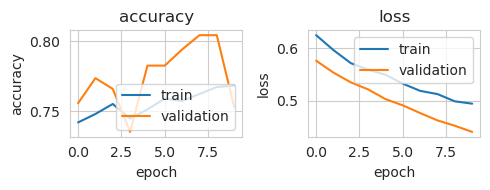

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[0], is_synthetic=True, tf_seed=100)